```yaml
#%mldev nb_context

pipeline:
    - imports
    - draw_graphs
    - draw_actions_probability
```

In [1]:
import glob
import re

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

RESULT_PATH = 'results/ts-experiment-mp/49'


def get_metric_files(metric_name):
    filepath_pattern = f'{RESULT_PATH}/{metric_name}.parquet'
    source_metric_files = glob.glob(filepath_pattern)
    
    res = []
    for metric_file in source_metric_files:
        res.append({
            'file': metric_file,
        })
    return res

#%mldev imports

In [ ]:
metrics = [
    'expected_stochastic_regret',
]


for metric_name in metrics:
    for metric_data in get_metric_files(metric_name):
        df = pd.read_parquet(metric_data['file'])
        df = df.reset_index()

        plt.figure(figsize=(10, 6))
        plt.title('Ожидаемый стохастический регрет в зависимости от раунда эксперимента')
        
        df.plot(ax=plt.gca(), kind='line', x='round', y=metric_name)
        plt.xlabel('Раунд')
        plt.ylabel('Ожидаемый стохастический регрет')
        
        plt.legend(loc='best')
        plt.show()
        plt.savefig(
            f"{RESULT_PATH}/charts/{metric_name}.png"
        )


#%mldev draw_graphs

     round        actions_probability
0        0  [0.5, 0.5, 0.0, 0.0, 1.0]
1        1  [0.5, 0.5, 0.0, 0.0, 1.0]
2        2  [0.0, 0.5, 0.5, 0.5, 0.5]
3        3  [0.5, 0.5, 0.0, 1.0, 0.0]
4        4  [0.5, 0.5, 0.5, 0.5, 0.0]
..     ...                        ...
995    995  [1.0, 0.0, 0.0, 1.0, 0.0]
996    996  [1.0, 0.0, 0.0, 1.0, 0.0]
997    997  [1.0, 0.0, 0.0, 1.0, 0.0]
998    998  [1.0, 0.0, 0.0, 1.0, 0.0]
999    999  [1.0, 0.0, 0.0, 1.0, 0.0]

[1000 rows x 2 columns]


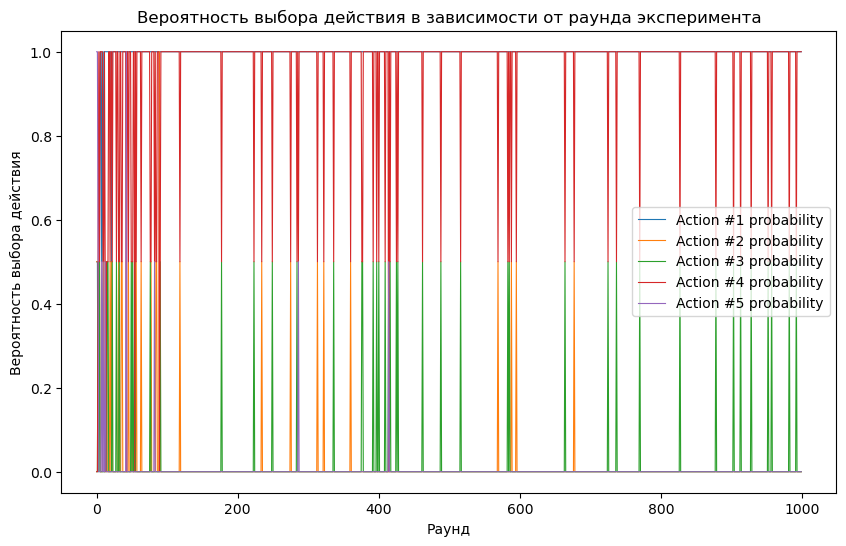

<Figure size 640x480 with 0 Axes>

In [2]:
metric_name = 'actions_probability'
for metric_data in get_metric_files(metric_name):
    df = pd.read_parquet(metric_data['file'])
    df = df.reset_index()
    
    action_count = len(df['actions_probability'][0])

    plt.figure(figsize=(10, 6))
    plt.xlabel('Раунд')
    plt.ylabel('Вероятность выбора действия')
    plt.title('Вероятность выбора действия в зависимости от раунда эксперимента')

    for action in range(action_count):
        plt.plot(
            df.index,
            df['actions_probability'].str[action],
            label=f'Action #{action+1} probability',
            linewidth=0.8,
        )
    plt.legend(loc='center right')
    plt.show()
    plt.savefig(
        f"{RESULT_PATH}/charts/{metric_name}.png"
    )


#%mldev draw_actions_probability